In [18]:
unzip_path = "./dataset/"

In [19]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import os
import pandas as pd

# data_url = "https://dshare.mathematik.uni-marburg.de/index.php/s/GrPtczNmDZQcn9f/download/training_dataset.zip"

# with urlopen(data_url) as zipresp:
#     with ZipFile(BytesIO(zipresp.read())) as zfile:
#         zfile.extractall(unzip_path)
        
print('Dataset extracted to "{:s}"'.format(os.path.realpath(unzip_path)))
df = pd.read_csv('dataset/train.csv', index_col='Id')
df.head(5)

Dataset extracted to "/workspaces/ml_hackathon/dataset"


,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,Hauszustand,Versorgung,Grundstuecksgroesse,Grundstuecksform,Gelaendekontur,Gelaendeneigung,Grundstueckanordnung,Strassenlaenge,Strassentyp,Zufahrtsweg,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,OberirdischeWohnflaeche,1Stockflaeche,2Stockflaeche,GeringequalitaetFlaeche,OberirdischeRaueme,Funktionalitaet,OberirdischeVollbadezimmer,OberirdischeHalbbadezimmer,Schlafzimmer,Kuechen,KuechenQualitaet,Kamine,Kaminqualitaet,Heizung,Heizungsqualitaet,Klimalanlage,Elektrik,Holzdeckflaeche,OffeneVerandaflaeche,GeschlosseneVerandaflaeche,3JahreszeitenVerandaflaeche,AbgeschirmteVerandaflaeche,Poolflaeche,Poolqualitaet,Zaunqualitaet,Garagentyp,Garagenbaujahr,Garageninnenausbau,Garagenautos,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,3,EGWA,918.54,Reg,Ebn,San,Eck,22.2,Pfla,NaN,Platten,Kein,0.0,ZiegAlg,ZiegAll,Flach,KiesTeer,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,84.96,84.96,0.00,0.0,4,Ger1,1,0,2,1,Ar,0,NaN,GasWD,Ar,N,SichAr,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,Abgetr,1966.0,NAu,2.0,47.52,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,5,EGWA,632.16,Reg,Ebn,San,Inn,18.0,Pfla,NaN,BetonGeg,Kein,0.0,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Ag,Gu,Ke,DWR,88.2,NAu,0.0,9.90,98.10,1.0,0.0,98.10,98.10,0.00,0.0,5,Typ,1,1,2,1,Du,0,NaN,GasWO,Gu,J,SLSRo,0.0,4.41,0.00,0.0,0.0,0.0,NaN,NaN,Verbund,2015.0,Aus,2.0,40.50,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,5,EGWA,1960.20,Reg,Ebn,San,Inn,19.8,Pfla,NaN,BetonGeg,Kein,0.0,Holz,HlzSch,Giebel,VerbSch,Du,Du,Ty,Ar,Ke,NAu,0.0,NAu,0.0,73.53,73.53,0.0,0.0,139.50,84.60,54.90,0.0,7,Ger2,1,1,3,1,Du,1,Du,GasWO,Gu,J,SichAr,0.0,0.00,38.61,0.0,0.0,0.0,NaN,MnPrv,Abgetr,1947.0,NAu,1.0,28.62,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,5,EGWA,868.41,UR1,Ebn,San,Inn,17.7,Pfla,NaN,BetonGeg,Kein,0.0,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Gu,Ty,Ke,NAu,0.0,NAu,0.0,84.69,84.69,0.0,0.0,147.96,86.49,61.47,0.0,7,Typ,2,1,3,1,Du,1,Du,GasWO,Ag,J,SLSRo,41.4,3.78,0.00,0.0,0.0,0.0,NaN,NaN,Verbund,2009.0,GAu,2.0,41.40,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,7,EGWA,1029.15,UR1,Hng,Mit,Eck,NaN,Pfla,NaN,BetonGeg,Kein,0.0,ZiegMau,Stuck,Giebel,VerbSch,Du,Du,Gu,Ty,Ke,NAu,0.0,NAu,0.0,71.28,71.28,0.0,0.0,136.53,71.28,65.25,0.0,7,Typ,1,0,3,1,Gu,2,Gu,GasWO,Ar,J,SLSRo,0.0,0.00,0.00,0.0,0.0,0.0,NaN,NaN,Abgetr,1941.0,NAu,2.0,36.00,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [20]:
features = df.columns[:-1]
features_20_1, features_20_2, features_20_3, features_19_4 = features[:20], features[20:40], features[40:60], features[60:]

df_20_1 = pd.concat([df[features_20_1], df['Verkaufspreis']], axis=1)
df_20_2 = pd.concat([df[features_20_2], df['Verkaufspreis']], axis=1)
df_20_3 = pd.concat([df[features_20_3], df['Verkaufspreis']], axis=1)
df_20_4 = pd.concat([df[features_19_4], df['Verkaufspreis']], axis=1)

In [21]:
pd.options.display.max_rows = 85
pd.options.display.max_columns = 85
df_20_2.describe(include='all')

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
count,2000,1986,1986.000000,2000,2000,2000,2000,2000,2000,1935,1935,1934,1937,1999.000000,1937,1999.000000,1999.000000,1999.000000,1998.000000,1998.000000,2000.00000
unique,6,4,NaN,14,15,6,6,4,5,4,4,4,6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,BetonGeg,Kein,NaN,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Ty,Ty,Ke,GWR,NaN,NAu,NaN,NaN,NaN,NaN,NaN,NaN
freq,906,1190,NaN,699,696,1579,1973,1220,1739,861,1769,1296,593,NaN,1707,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,9.060906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.641016,NaN,4.287899,49.829655,93.758569,0.421922,0.056557,153708.42060
std,NaN,NaN,15.776509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.240276,NaN,14.681256,38.799414,40.553955,0.519678,0.233208,68822.30926
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,10870.65000
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,20.070000,70.200000,0.000000,0.000000,109650.00000
50%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.390000,NaN,0.000000,41.400000,88.920000,0.000000,0.000000,136000.00000
75%,NaN,NaN,14.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.385000,NaN,0.000000,71.280000,115.200000,1.000000,0.000000,181475.00000


# Analyze Flow

### Keller:
- leere Werte zu NA "Keine Keller" ändern
- Kellerbereichgroesse1 - fehlende Werte mit 0.0 auffüllen
- Kellerbereichgroesse2 - fehlende Werte mit 0.0 auffüllen
- KellerbereichgroesseGes - fehlende Werte mit 0.0 auffüllen
- KellerbereichgroesseNau - fehlende Werte mit 0.0 auffüllen
- KellerVollbadezimmer - fehlende Werte mit 0.0 auffüllen
- KellerHalbbadezimmer - fehlende Werte mit 0.0 auffüllen

- Kellerbereichgroesse2 - viele Werte 0 da kein zweiter Keller und Korrelation 0.025 - löschen?

### Mauerwerktyp und Mauerwerkfläche
- bei 14 Datensätze fehlen beide Werte - zu "Kein" und 0 ändern
-

### Dachmeterial:
- evtl löschen, da 1973 mal selber wert

In [22]:
import matplotlib.pyplot as plt

def plot_feature(df, feature):
    plt.figure(figsize=(10, 5))
    plt.scatter(df[feature], df['Verkaufspreis'])
    plt.xlabel(feature)
    plt.ylabel('Verkaufspreis')
    plt.show()

In [42]:
def plot_all_features(df):
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.scatter(df[feature], df['Verkaufspreis'])
            plt.xlabel(feature)
            plt.ylabel('Verkaufspreis')
        except Exception as e:
            print(e)
    plt.show()

num must be an integer with 1 <= num <= 20, not 21


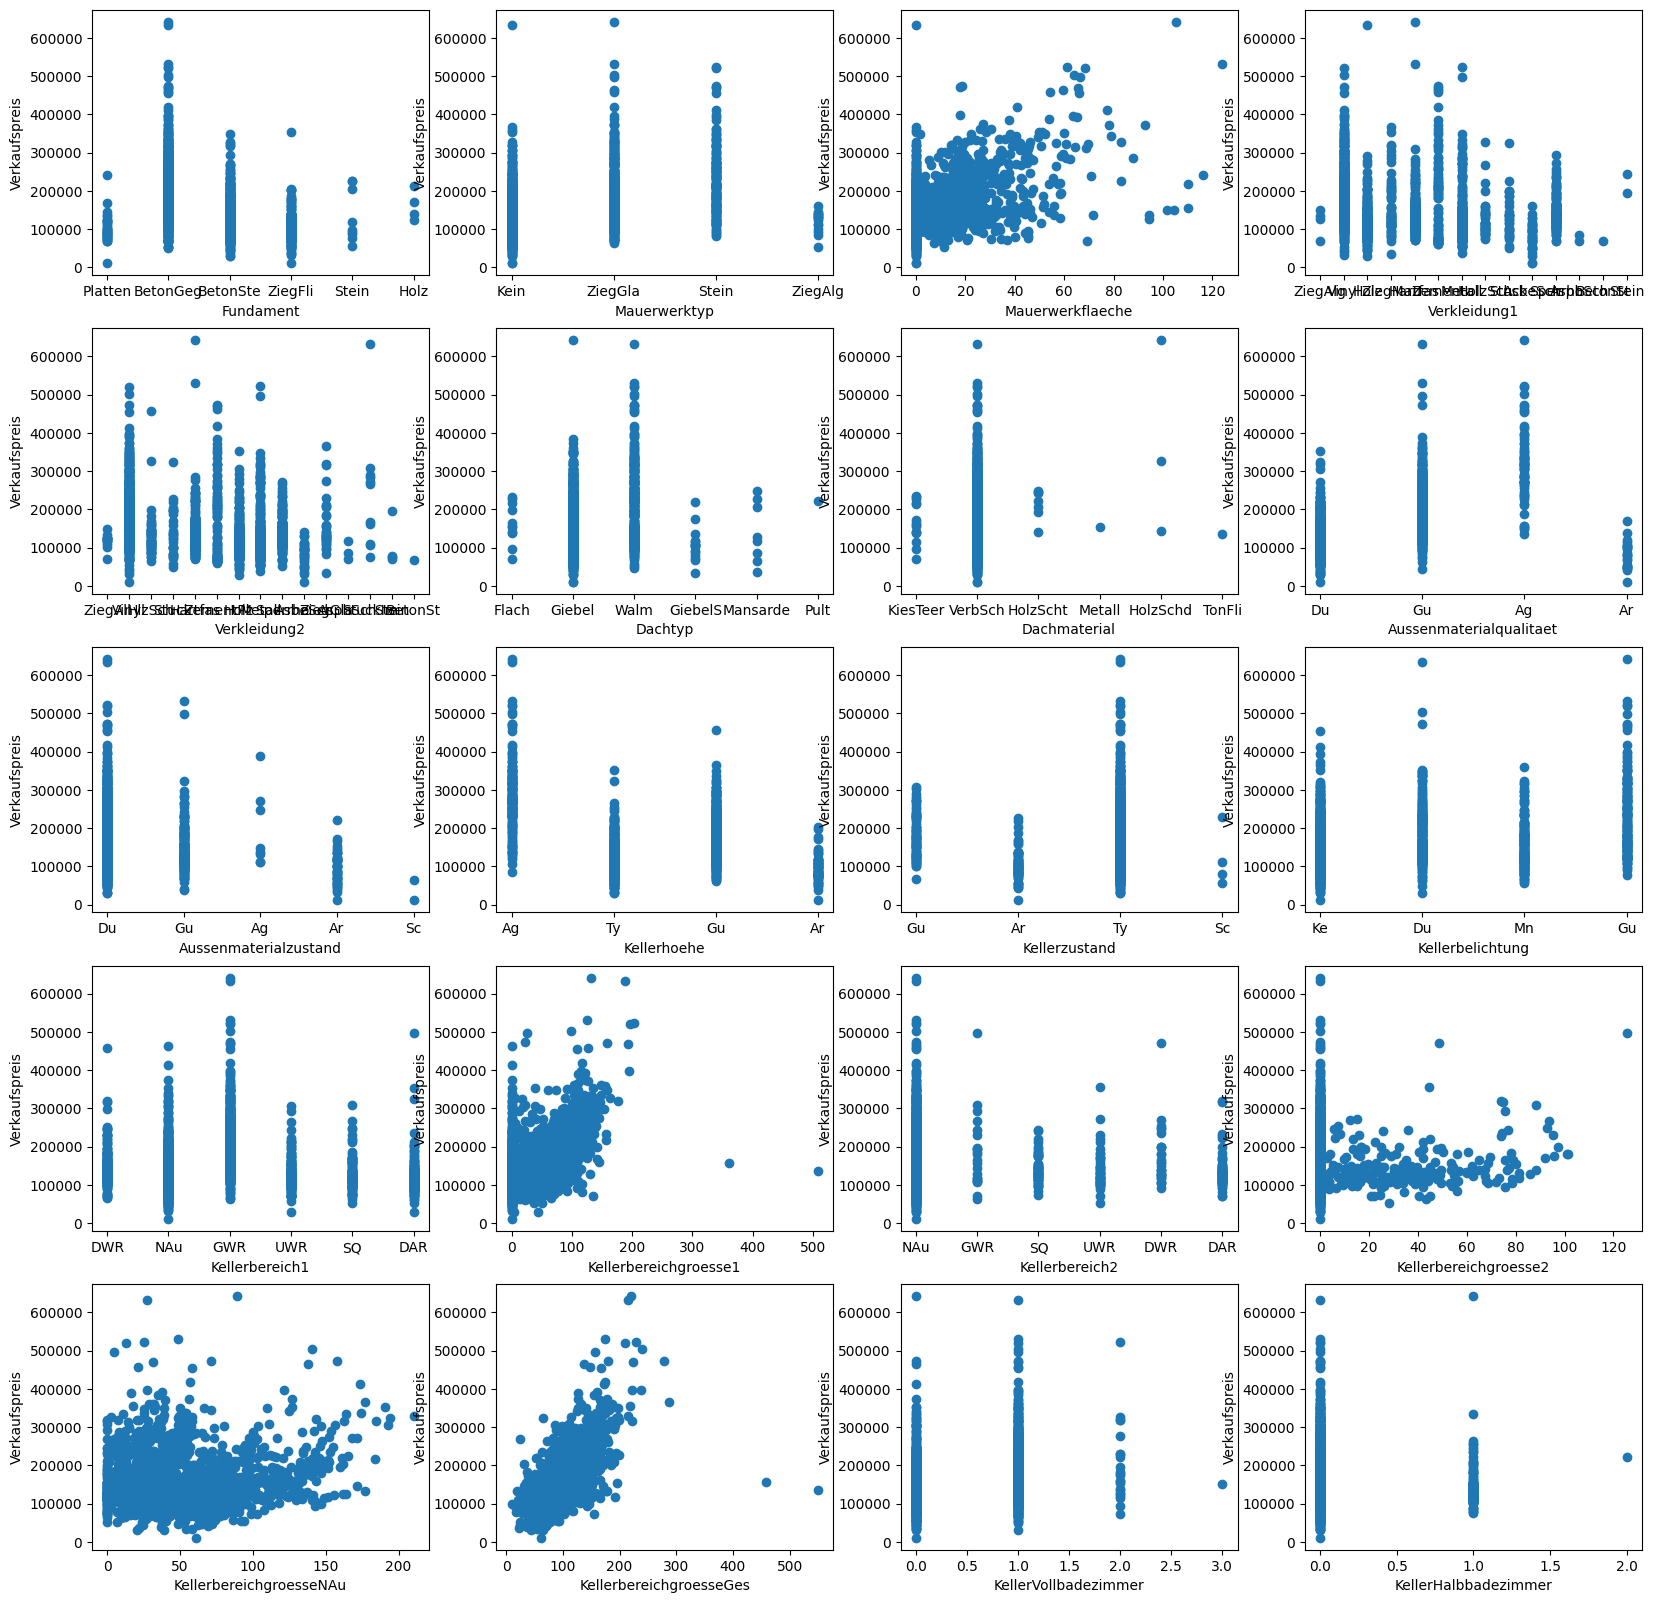

In [43]:
plot_all_features(df_20_2)

In [60]:
def drawbox_all(df):
    plt.figure(figsize=(20, 20))
    # get only numeric features
    df = df.select_dtypes(include=['float64', 'int64'])
    for i, feature in enumerate(df.columns):
        # delete empty values
        df = df[df[feature].notnull()]
        try:
            plt.subplot(5, 4, i+1)
            plt.boxplot(df[feature])
            plt.xlabel(feature)
        except Exception as e:
            print(e)
    plt.show()
    

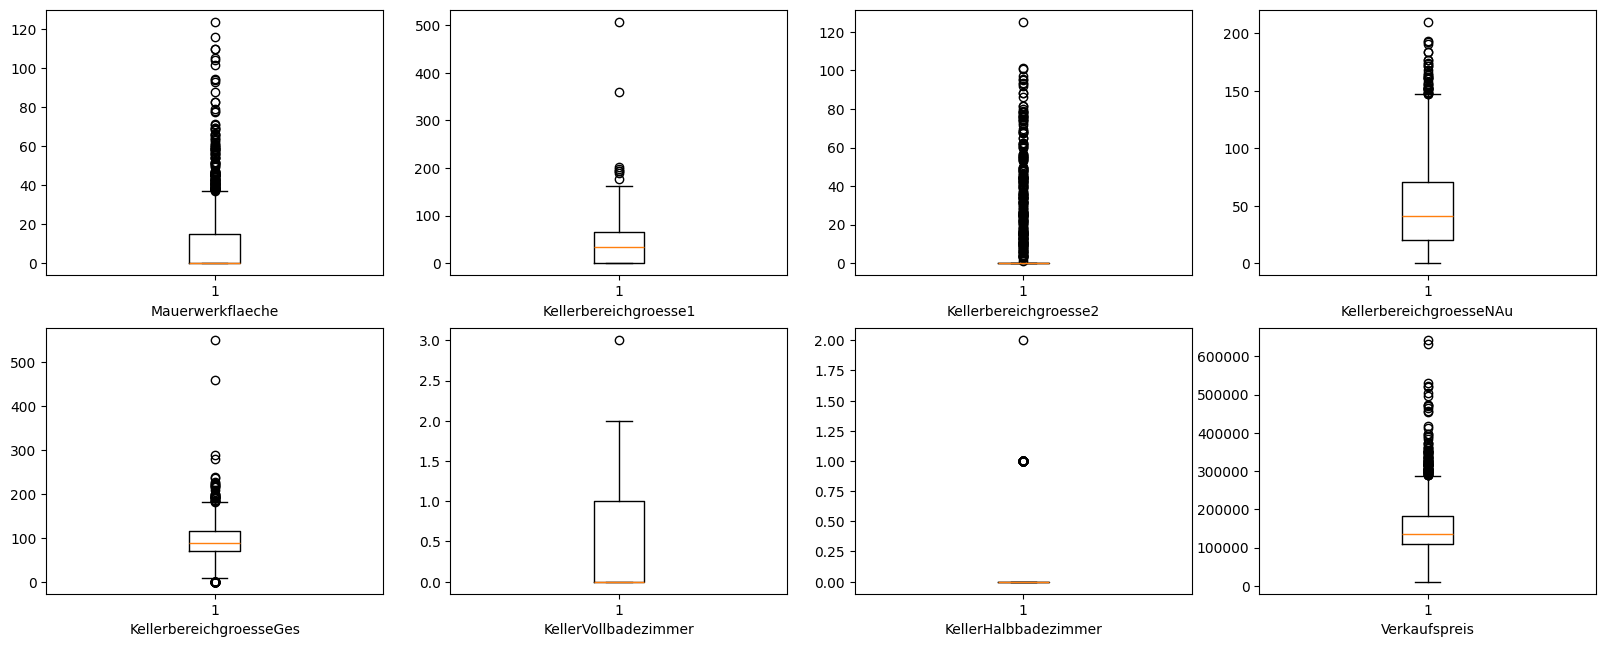

In [61]:
drawbox_all(df_20_2)

In [64]:
def calculate_correlation(df):
    df = df.select_dtypes(include=['float64', 'int64'])
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    return corr

In [65]:
calculate_correlation(df_20_2)

,Mauerwerkflaeche,Kellerbereichgroesse1,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
Mauerwerkflaeche,1.000000,0.290041,0.001515,0.104695,0.395093,0.147556,0.015106,0.513073
Kellerbereichgroesse1,0.290041,1.000000,-0.039868,-0.457726,0.564568,0.632484,0.096986,0.443108
Kellerbereichgroesse2,0.001515,-0.039868,1.000000,-0.231715,0.099785,0.165763,0.080442,0.025036
KellerbereichgroesseNAu,0.104695,-0.457726,-0.231715,1.000000,0.407378,-0.383817,-0.095483,0.175611
KellerbereichgroesseGes,0.395093,0.564568,0.099785,0.407378,1.000000,0.336438,0.036461,0.627685
KellerVollbadezimmer,0.147556,0.632484,0.165763,-0.383817,0.336438,1.000000,-0.135017,0.282349
KellerHalbbadezimmer,0.015106,0.096986,0.080442,-0.095483,0.036461,-0.135017,1.000000,-0.010584
Verkaufspreis,0.513073,0.443108,0.025036,0.175611,0.627685,0.282349,-0.010584,1.000000


In [71]:
df_20_2['Kellerbereichgroesse2'].value_counts()

Kellerbereichgroesse2
0.00     1769
26.46       4
33.66       3
15.12       3
53.64       2
         ... 
25.56       1
23.76       1
22.23       1
20.88       1
33.93       1
Name: count, Length: 198, dtype: int64

In [72]:
df_20_2['Kellerbereich2'].value_counts()

Kellerbereich2
NAu    1707
DAR      73
SQ       58
UWR      46
DWR      30
GWR      23
Name: count, dtype: int64

In [76]:
# count where Kellerbereich2 is NAu and Kellerbereichgroesse2 is zero
df_20_2[(df_20_2['Kellerbereich2'] != "NAu") & (df_20_2['Kellerbereichgroesse2'] == 0)].count()

Fundament                  62
Mauerwerktyp               62
Mauerwerkflaeche           62
Verkleidung1               62
Verkleidung2               62
Dachtyp                    62
Dachmaterial               62
Aussenmaterialqualitaet    62
Aussenmaterialzustand      62
Kellerhoehe                 0
Kellerzustand               0
Kellerbelichtung            0
Kellerbereich1              0
Kellerbereichgroesse1      62
Kellerbereich2              0
Kellerbereichgroesse2      62
KellerbereichgroesseNAu    62
KellerbereichgroesseGes    62
KellerVollbadezimmer       61
KellerHalbbadezimmer       61
Verkaufspreis              62
dtype: int64

In [25]:
df_20_2[df_20_2['Mauerwerktyp'].isnull()]

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
18,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Du,Du,Gu,Ty,Du,GWR,42.75,DWR,26.73,12.78,82.26,1.0,0.0,99662.50
219,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,63.63,63.63,0.0,0.0,149600.00
340,BetonGeg,NaN,NaN,Zement,ZementPl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,73.17,73.17,0.0,0.0,175057.50
390,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Ag,Du,Ag,Gu,Gu,GWR,124.74,NAu,0.00,62.10,186.84,1.0,0.0,395250.00
453,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,GWR,56.25,NAu,0.00,21.15,77.40,1.0,0.0,184025.00
746,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,137.52,137.52,0.0,0.0,200494.60
853,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Ag,Ty,Ke,NAu,0.00,NAu,0.00,129.24,129.24,0.0,0.0,191250.00
856,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Gu,Ty,Ke,NAu,0.00,NAu,0.00,75.60,75.60,0.0,0.0,168725.00
1321,BetonGeg,NaN,NaN,Vinyl,Vinyl,Giebel,VerbSch,Gu,Du,Ag,Gu,Ke,GWR,140.58,NAu,0.00,9.72,150.30,1.0,0.0,286297.00


In [26]:
df_20_2[df_20_2["Kellerhoehe"].isnull()]

,Fundament,Mauerwerktyp,Mauerwerkflaeche,Verkleidung1,Verkleidung2,Dachtyp,Dachmaterial,Aussenmaterialqualitaet,Aussenmaterialzustand,Kellerhoehe,Kellerzustand,Kellerbelichtung,Kellerbereich1,Kellerbereichgroesse1,Kellerbereich2,Kellerbereichgroesse2,KellerbereichgroesseNAu,KellerbereichgroesseGes,KellerVollbadezimmer,KellerHalbbadezimmer,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,Platten,Kein,0.00,ZiegAlg,ZiegAll,Flach,KiesTeer,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,69700.00
28,Platten,Kein,0.00,HolzSch,HlzSch,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,83300.00
47,BetonSte,Kein,0.00,Sperrho,Sperrho,Giebel,VerbSch,Du,Gu,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,69105.00
78,BetonSte,Kein,0.00,Holz,Holz,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,130475.00
106,Platten,Kein,0.00,Hartfas,Hartfas,Giebel,VerbSch,Du,Ar,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,101119.40
117,Platten,Kein,0.00,ZiegMau,Holz,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,93415.00
177,Platten,ZiegGla,45.00,Hartfas,Hartfas,Giebel,VerbSch,Gu,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,168725.00
212,BetonSte,Kein,0.00,AsphSch,AsphSch,Walm,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,85000.00
221,Platten,Kein,0.00,Hartfas,Hartfas,Giebel,VerbSch,Du,Du,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.00,0.0,0.0,101029.30
